# Lab Assignment 4 DA221

- Name: Aryan Gupta
- Roll: 230150003
- Date: 10/03/25

## Importing libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt

np.random.seed(5)

no_of_samples = 100
epochs=30

## Task 1

### (a)

In [130]:
x = np.random.uniform(0,2,no_of_samples)
y = 4 + 3*x + np.random.normal(size=no_of_samples)

### (b)

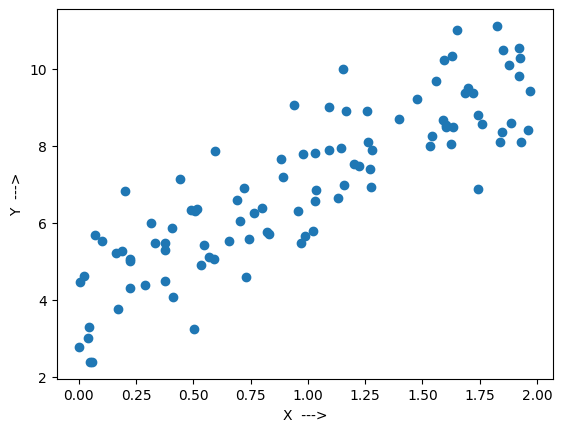

In [131]:
plt.figure()
plt.scatter(x,y)
plt.xlabel('X  --->')
plt.ylabel('Y  --->')
plt.show()

## Task 2

### (a)

In [132]:
# c = theta0
# m = theta1
m = np.random.uniform(0,10) # limits are chosen by looking at the graph
c = np.random.uniform(0,5) # limits are chosen by looking at the graph
alpha = 1e-7

MSE=[]
for _ in range(epochs):
    # calculating predicted values
    y_pred = m * x + c
    # storing MSE
    MSE.append(np.mean((y_pred-y)**2))

    # calculating gradients
    grad_m = -2 * np.mean(x*(y-y_pred))
    grad_c = -2 * np.mean(y-y_pred)
    # updating values
    m-=alpha * grad_m
    c-=alpha * grad_c


### (b)

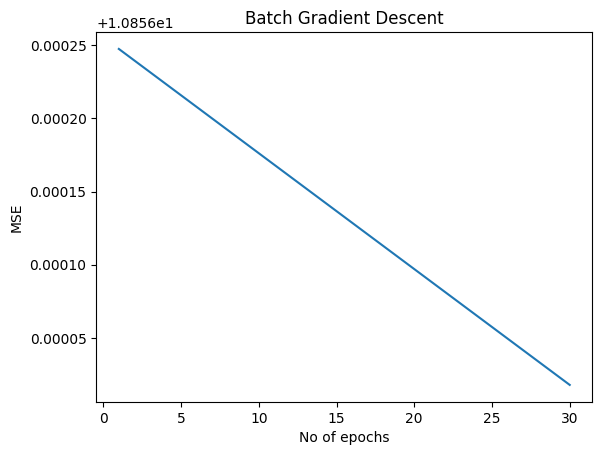

In [133]:
plt.figure()
plt.plot(range(1,epochs+1), MSE)
plt.xlabel('No of epochs')
plt.ylabel('MSE')
plt.title('Batch Gradient Descent')
plt.show()

A decreasing straight line can be seen in the MSE vs no of epochs curve.

## Task 3

### (a)

In [134]:
# c = theta0
# m = theta1
m = np.random.uniform(0,10) # limits are chosen by looking at the graph
c = np.random.uniform(0,5) # limits are chosen by looking at the graph
alpha = 0.01

# getting random indices
index = np.arange(no_of_samples)

MSE=[]
for _ in range(epochs):
    np.random.shuffle(index)
    
    # checking and updating each random value
    for i in index:
        # calculating predicted value
        y_pred = m * x[i] + c

        # calculating gradients
        grad_m = -2 * (x[i] * (y[i] - y_pred))
        grad_c = -2 * (y[i] - y_pred)
        # updating values
        m-=alpha * grad_m
        c-=alpha * grad_c
    y_pred = m*x+c
    # storing MSE
    MSE.append(np.mean((y_pred-y)**2))

### (b)

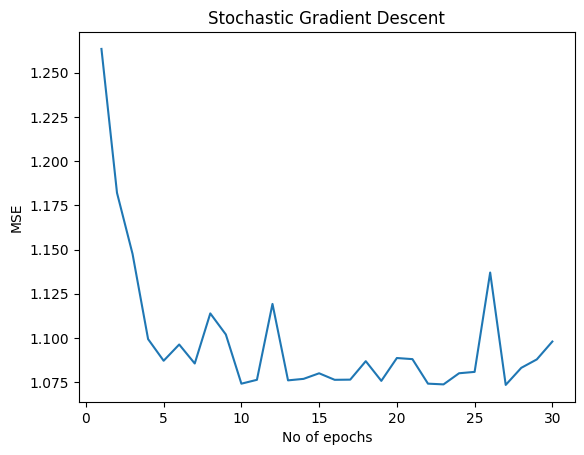

In [135]:
plt.figure()
plt.plot(range(1,epochs+1), MSE)
plt.xlabel('No of epochs')
plt.ylabel('MSE')
plt.title('Stochastic Gradient Descent')
plt.show()

We get a very zig-zag pattern with lots of troughs and crests, unlike batch gradient descent which showed a straight line.

## Task 4

### (a)

In [136]:
# c = theta0
# m = theta1
m = np.random.uniform(0,10) # limits are chosen by looking at the graph
c = np.random.uniform(0,5) # limits are chosen by looking at the graph
alpha = 0.001
batch_size=20

# getting random indices
index = np.arange(no_of_samples)

MSE=[]
for k in range(epochs):
    np.random.shuffle(index)

    # getting mini-batches
    for j in range(0,no_of_samples,batch_size):
        x_bat=x[index[j:j+batch_size]]
        y_bat=y[index[j:j+batch_size]]

        # calculating predicted values
        y_pred = m * x_bat + c

        # calculating gradients
        grad_m = -2 * np.mean(x_bat*(y_bat-y_pred))
        grad_c = -2 * np.mean(y_bat-y_pred)
        # updating values
        m-=alpha * grad_m
        c-=alpha * grad_c
    # storing MSE
    y_pred=m*x+c
    MSE.append(np.mean((y_pred-y)**2))

### (b)

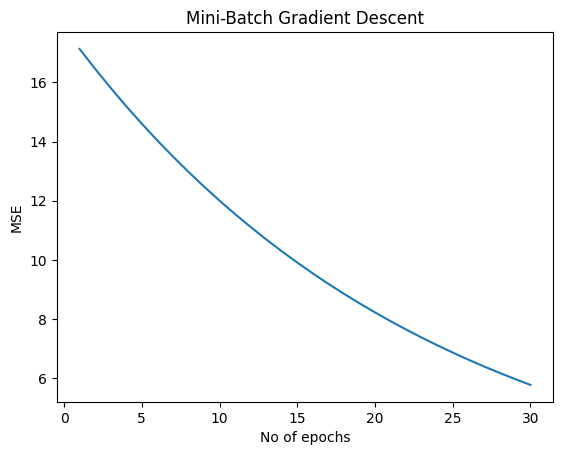

In [137]:
plt.figure()
plt.plot(range(1,epochs+1), MSE)
plt.xlabel('No of epochs')
plt.ylabel('MSE')
plt.title('Mini-Batch Gradient Descent')
plt.show()